## SCC5920 - Mineração de Dados Não Estruturados (2024)



**Atividade 1 - Nivelamento em Mineração de Dados**

Prof. Ricardo Marcacini

**Aluno:** Breno Livio Silva de Almeida

**NUSP:** 10276675

---

### Parte 1: Seleção da Base de Dados

A base de dados selecionada foi a *Students Performance Dataset* disponível na plataforma [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset). Esta base de dados contém informações abrangentes sobre 2.392 estudantes do ensino médio, detalhando aspectos demográficos, hábitos de estudo, envolvimento dos pais, atividades extracurriculares e desempenho acadêmico. A variável alvo, `GradeClass`, classifica as notas dos estudantes em diferentes categorias, fornecendo um conjunto de dados robusto para pesquisas educacionais, modelagem preditiva e análise estatística.

Temos as seguintes variáveis:

`StudentID`: Discreta e nominal — identificador único de cada estudante.

`Age`: Contínua — idade dos estudantes, variando de 15 a 18 anos.

`Gender`: Nominal — gênero dos estudantes, codificado como 0 (masculino) ou 1 (feminino).

`Ethnicity`: Nominal — etnia dos estudantes, codificada como:

    0: Caucasiano
    1: Afro-Americano
    2: Asiático
    3: Outro

`ParentalEducation`: Ordinal — nível de educação dos pais, codificado como:

    0: Nenhum
    1: Ensino Médio
    2: Alguma Faculdade
    3: Bacharelado
    4: Superior

`StudyTimeWeekly`: Contínua — tempo semanal de estudo em horas, variando de 0 a 20.

`Absences`: Discreta — número de ausências durante o ano letivo, variando de 0 a 30.

`Tutoring`: Nominal — status de tutoria, codificado como 0 (Não) ou 1 (Sim).

`ParentalSupport`: Ordinal — nível de apoio dos pais, codificado como:

    0: Nenhum
    1: Baixo
    2: Moderado
    3: Alto
    4: Muito Alto

`Extracurricular`: Nominal — participação em atividades extracurriculares, codificado como 0 (Não) ou 1 (Sim).

`Sports`: Nominal — participação em esportes, codificado como 0 (Não) ou 1 (Sim).

`Music`: Nominal — participação em atividades musicais, codificado como 0 (Não) ou 1 (Sim).

`Volunteering`: Nominal — participação em voluntariado, codificado como 0 (Não) ou 1 (Sim).

`GPA`: Contínua — média das notas (GPA) em uma escala de 2,0 a 4,0.

`GradeClass`: Ordinal — classificação das notas dos estudantes com base no GPA:

    0: 'A' (GPA ≥ 3,5)
    1: 'B' (3,0 ≤ GPA < 3,5)
    2: 'C' (2,5 ≤ GPA < 3,0)
    3: 'D' (2,0 ≤ GPA < 2,5)
    4: 'F' (GPA < 2,0)

---

### Parte 2: Pré-processamento

Para manipular nossa base de dados, iremos utilizar da ferramenta Polars. A variável `StudentID` será eliminada por ser apenas um identificador. Como queremos predizer a variável `GradeClass`, também vamos eliminar a variável `GPA` já que esta corresponde à mesma ideia.

In [ ]:
import polars as pl

df_student = pl.read_csv("students.csv")
df_student = df_student.drop(["StudentID", "GPA"])
df_student

Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64
17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
15,0,2,3,4.21057,26,0,2,0,0,0,0,4.0
17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
…,…,…,…,…,…,…,…,…,…,…,…,…
18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
16,1,0,2,6.8055,20,0,2,0,0,0,1,2.0


Podemos checar o desbalanceamento de classes em nossa base de dados.

In [ ]:
df_student["GradeClass"].value_counts()

GradeClass,count
f64,u32
0.0,107
1.0,269
3.0,414
4.0,1211
2.0,391


Agora podemos padronizar e selecionar características de maior relevância para a tarefa de classificação. Para isso, podemos utilizar do módulo `Pipeline` do scikit-learn que permite a inserção de etapas como essas. Para padronizar nossos dados, vamos utilizar do `StandardScaler` e para a seleção de cacterísticas, do método `SelectKBest` utilizando do `f_classif`, que computa o valor F ANOVA. Ao final temos o nosso data set já transformado com a padronização e as 5 melhores características.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif, k=5))
])

X, y = df_student.drop("GradeClass"), df_student.select("GradeClass")["GradeClass"]
feature_names = X.columns

X_transformed = pipeline.fit_transform(X, y)

X_transformed.shape

(2392, 5)

Também podemos visualizar as 5 características mais relevantes que foram escolhidas. Podemos ver que a característica referente às faltas dos alunos tem grande impacto no desempenho final.

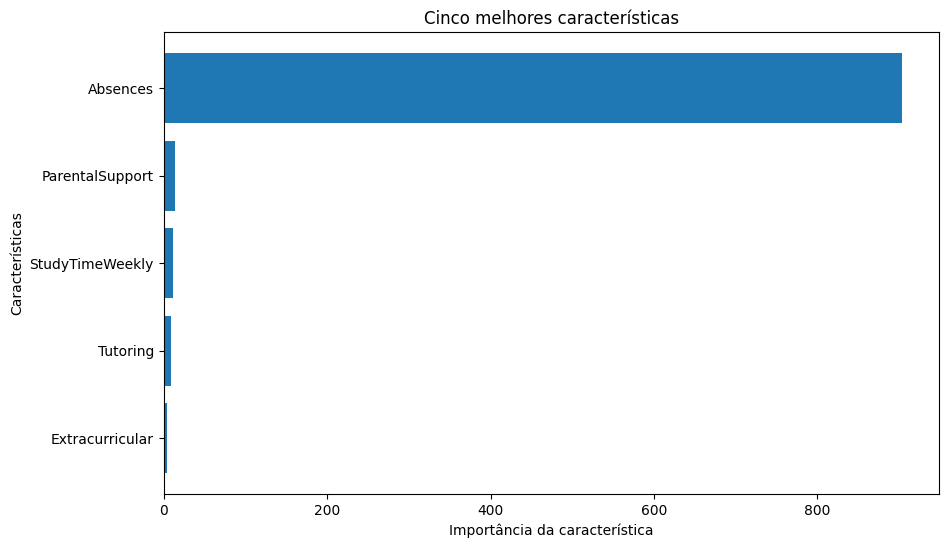

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

select_k_best = pipeline.named_steps["feature_selection"]

selected_indices = select_k_best.get_support(indices=True)
selected_scores = select_k_best.scores_[selected_indices]
selected_feature_names = np.array(feature_names)[selected_indices]

sorted_indices = np.argsort(selected_scores)[::-1]
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_scores = selected_scores[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_scores)
plt.xlabel("Importância da característica")
plt.ylabel("Características")
plt.title("Cinco melhores características")
plt.gca().invert_yaxis()
plt.show()

---

### Parte 3: Extração de Padrões e Pós-processamento


Nesta parte, prosseguimos para a classificação e clustering de nossa base de dados. Para evitar problemas como *data leak* na classificação vamos criar uma nova *pipeline* que faça todas as etapas desde padronização, seleção de características e classificação. Com isso, ao utilizar de *k-fold cross-validation*, as partes utilizadas para treino e teste serão lidadas de forma adequada. Vamos utilizar todas as características e o KNN como classificador utilizando hiperparâmetros padrões e obter o `cross_val_score`. Adicionalmente, como a base é multiclasse e desbalanceada, se torna importante a utilização de métricas como F1-Score usando a média micro para avaliar o desempenho. De padrão, muitos métodos de validação cruzada no scikit-learn já utilizam a divisão estratificada dos dados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif, k="all")),
    ("knn", KNeighborsClassifier())
])

scores = cross_val_score(pipeline, X, y, cv=10, scoring="f1_micro")

print(f"{np.mean(scores):.4f} +- {np.std(scores):.4f}")

0.5723 +- 0.0462


Note que ao considerar apenas as 5 melhores características, como fizemos antes, temos um desempenho consideravelmente superior.

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif, k=5)),
    ("knn", KNeighborsClassifier())
])

scores = cross_val_score(pipeline, X, y, cv=10, scoring="f1_micro")

print(f"{np.mean(scores):.4f} +- {np.std(scores):.4f}")

0.6864 +- 0.0810


A validação cruzada mostrou que o modelo básico nos retorna um desempenho médio de 0.6864 +- 0.0810 em F1-Score média micro. Vamos fazer o mesmo agora variando o valor de *k* e a medida de similaridade para o classificador KNN com o `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(f_classif, k=5)),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    "knn__metric": ["euclidean", "manhattan"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_micro", n_jobs=-1)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor média 10-fold CV: {grid_search.best_score_:.4f}")

Melhores parâmetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 19}
Melhor média 10-fold CV: 0.7032


Podemos ver uma leve melhora ao se utilizar um modelo que utiliza KNN com k=19 e distância manhattan.

Vamos para técnicas de clustering utilizando do algoritmo *k-means*. Vamos utilizar da medida de Silhouette para determinar o melhor número de grupos, variando o valor de *k* escolhido. O valor da medida tem como melhor valor 1 e o pior valor sendo -1. Valores próximos de 0 indicam clusters sobrepostos.

Para k=2, a medida de Silhouette é 0.2220
Para k=3, a medida de Silhouette é 0.2425
Para k=4, a medida de Silhouette é 0.2415
Para k=5, a medida de Silhouette é 0.2060
Para k=6, a medida de Silhouette é 0.2254
Para k=7, a medida de Silhouette é 0.2325
Para k=8, a medida de Silhouette é 0.2290
Para k=9, a medida de Silhouette é 0.2239
O melhor número de clusters com base na medida de Silhouette é 3


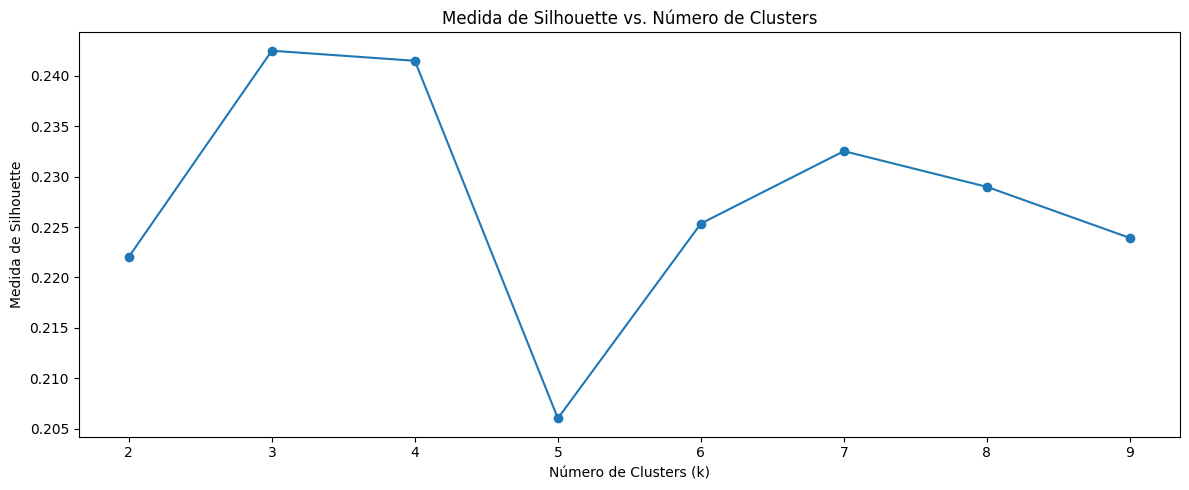

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score

silhouette_scores = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, cluster_labels, random_state=42)
    silhouette_scores.append(silhouette_avg)
    print(f"Para k={k}, a medida de Silhouette é {silhouette_avg:.4f}")

best_k = k_range[np.argmax(silhouette_scores)]
print(f"O melhor número de clusters com base na medida de Silhouette é {best_k}")

plt.figure(figsize=(12, 5))

plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Medida de Silhouette vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Medida de Silhouette')

plt.tight_layout()
plt.show()

De acordo com os valores apresentados, o uso de 3 clusters se mostra como a configuração mais interessante para o cenário de agrupamento. Vamos agora avaliar a qualidade do agrupamento obtido com o Rand Index. Essa medida pode variar de 0 a 1.

In [ ]:
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(X_transformed)

rand_index = rand_score(y, cluster_labels)
print(f"A medida Rand Index é {rand_index:.4f}")

A medida Rand Index é 0.5587


Esse valor pode indicar que o clustering capturou algumas das estruturas subjacentes nos dados, mas ainda são necessários ajustes significativos. Os valores de Silhouette já mostravam como o agrupamento desses dados pode ser considerado "fraco", necessitando possivelmente de técnicas de redução de dimensionalidade para alcançar um desempenho superior.